In [2]:
import plotly
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [3]:
import pandas as pd

# Define column names based on the structure of your data
columns = ["ID", "Code", "Category", "Country", "Text", "Label"]

# Read the TSV file into a dataframe with specified column names and skip rows containing the disclaimer
try:
    df = pd.read_csv("dontpatronizeme_pcl.tsv", sep='\t', header=None, names=columns, skiprows=3, index_col='ID')
except pd.errors.ParserError as e:
    print("ParserError:", e)

df['BinaryLabel'] = df['Label'].apply(lambda x: 0 if x == 0 or x == 1 else 1)
df = df.dropna()
df["TextLength"] = df["Text"].apply(lambda x: len(x))


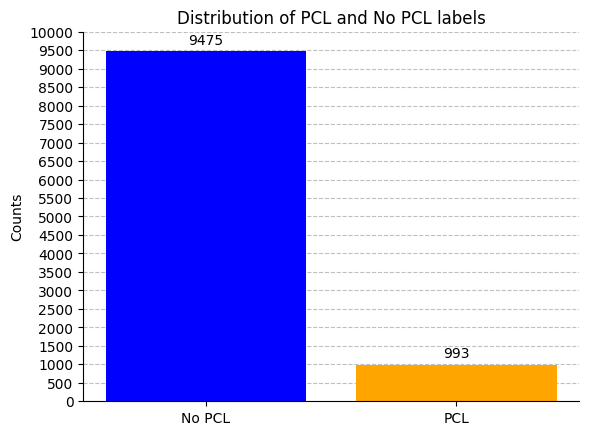

In [8]:
# Distribution of labels

# Count the occurrences of each label
no_pcl_count = len(df[df["BinaryLabel"] == 0])
pcl_count = len(df[df["BinaryLabel"] == 1])

# Data
labels = ['No PCL', 'PCL']
counts = [no_pcl_count, pcl_count]

# Plotting
fig, ax = plt.subplots()
bars = ax.bar(labels, counts, color=['blue', 'orange'])  # Custom colors for each bar

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Distribution of PCL and No PCL labels')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticks(np.arange(0, no_pcl_count + pcl_count, 500))

# Adding counts above bars
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')


# Optionally, you can remove the top and right spines to make it look nicer
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(which='major', axis='y', linestyle='--', color='grey', alpha=0.5)
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

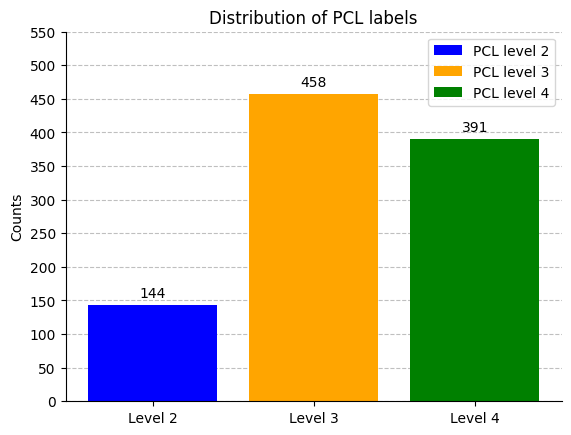

In [6]:
# Count the occurrences of each PCL level
level_2_count = len(df[df["Label"] == 2])
level_3_count = len(df[df["Label"] == 3])
level_4_count = len(df[df["Label"] == 4])

# Data
levels = ['Level 2', 'Level 3', 'Level 4']
counts = [level_2_count, level_3_count, level_4_count]

# Plotting
fig, ax = plt.subplots()
bars = ax.bar(levels, counts, color=['blue', 'orange', 'green'])  # Custom colors for each bar

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Distribution of PCL labels')
ax.set_xticks(range(len(levels)))
ax.set_xticklabels(levels)
ax.legend(bars, ['PCL level 2', 'PCL level 3', 'PCL level 4'])

for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Adding a grid
ax.grid(which='major', axis='y', linestyle='--', color='grey', alpha=0.5)
ax.set_axisbelow(True)

ax.set_yticks(np.arange(0, level_3_count + 100, 50))

# Optionally, you can remove the top and right spines to make it look nicer
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()


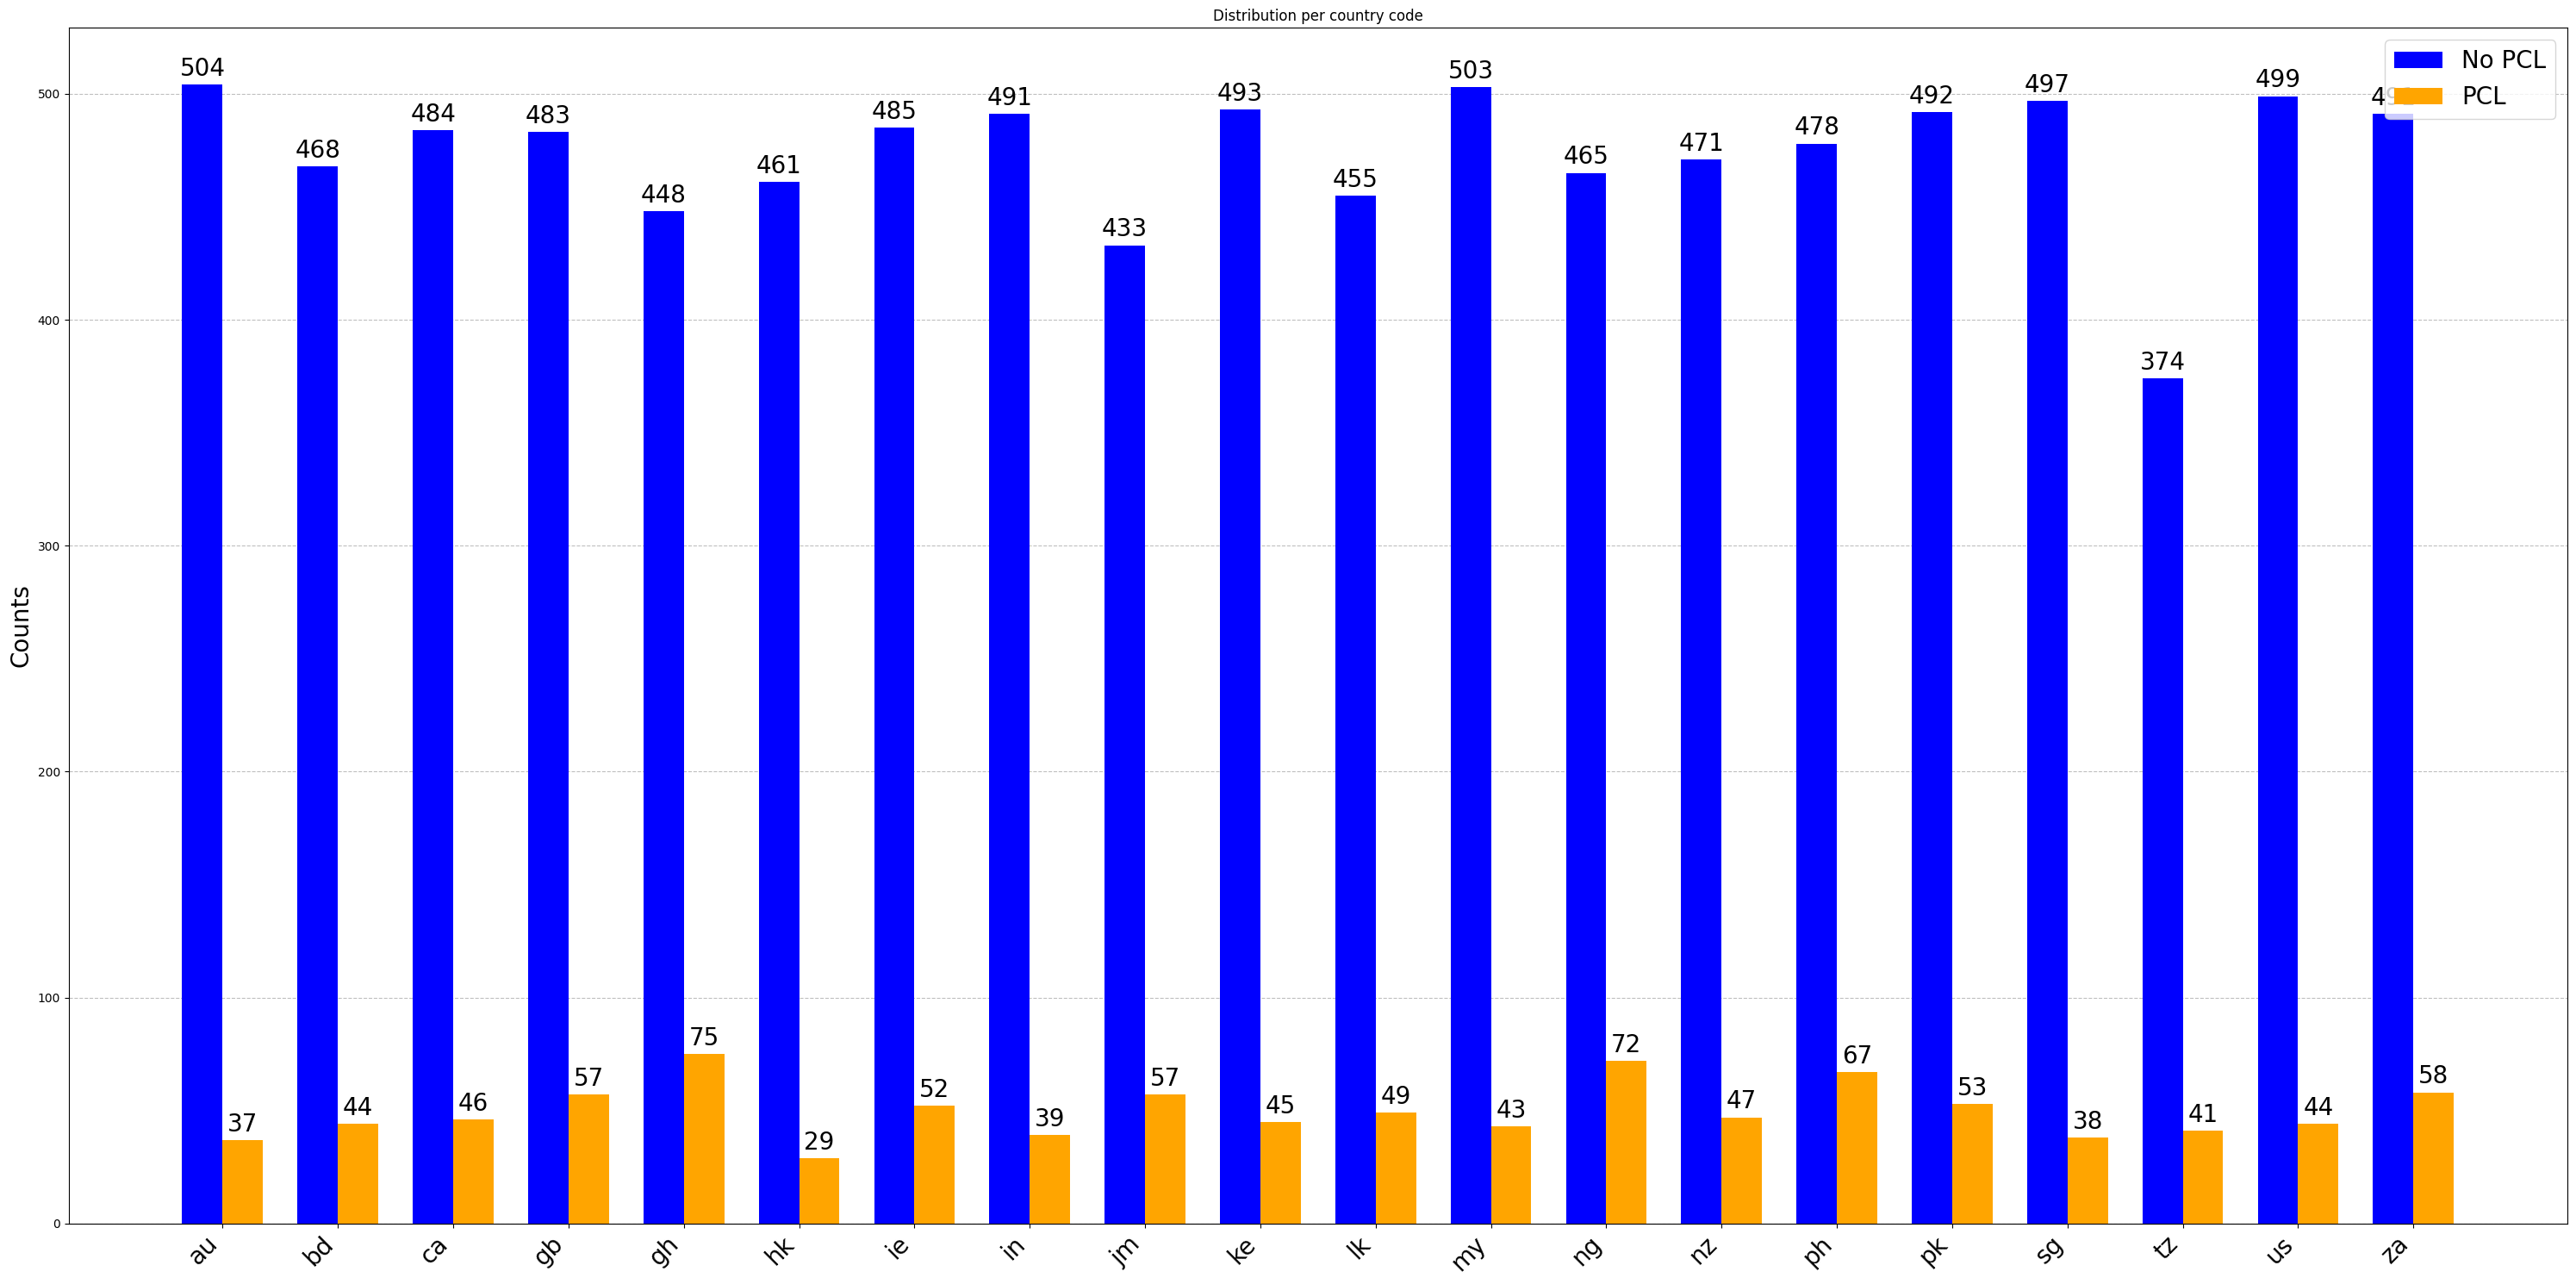

In [45]:
# Extract unique country codes
countries = np.unique(df["Country"])

# Calculate counts for each country and label
no_pcl_counts = [len(df[(df["Country"] == c) & (df["BinaryLabel"] == 0)]) for c in countries]
pcl_counts = [len(df[(df["Country"] == c) & (df["BinaryLabel"] == 1)]) for c in countries]


# Setting up the figure and axes for the grouped bar chart
# Increase the figure width here. For example, set width to 15 inches and height to 6 inches.
fig, ax = plt.subplots(figsize=(30, 15))

# Set the positions of the bars on the x-axis
x = np.arange(len(countries))

# Make the plot
bar_width = 0.35  # Width of the bars
bars1 = ax.bar(x - bar_width/2, no_pcl_counts, bar_width, label='No PCL', color='blue')
bars2 = ax.bar(x + bar_width/2, pcl_counts, bar_width, label='PCL', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Counts', fontsize=20)
ax.set_title('Distribution per country code')
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=45, ha="right", fontsize=20)
ax.legend(fontsize=20)

# Function to add a label on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=20)

# Call the function to add labels on top of the bars
add_labels(bars1)
add_labels(bars2)

# Adding a grid
ax.grid(which='major', axis='y', linestyle='--', color='grey', alpha=0.5)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

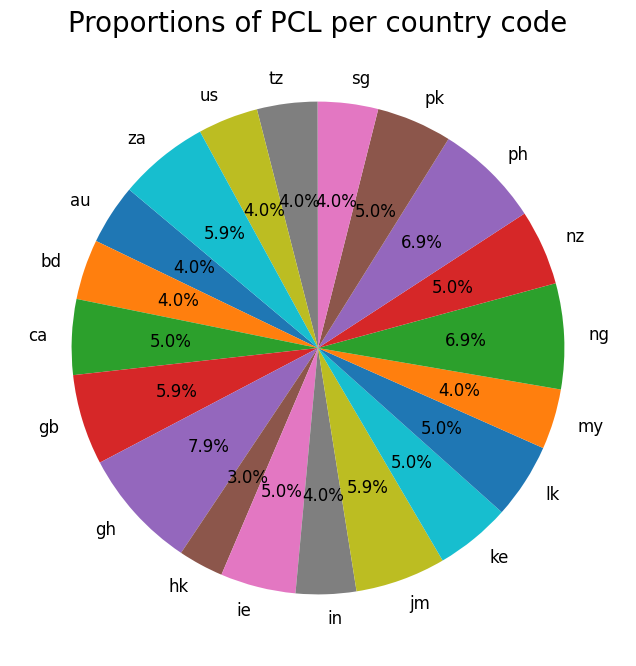

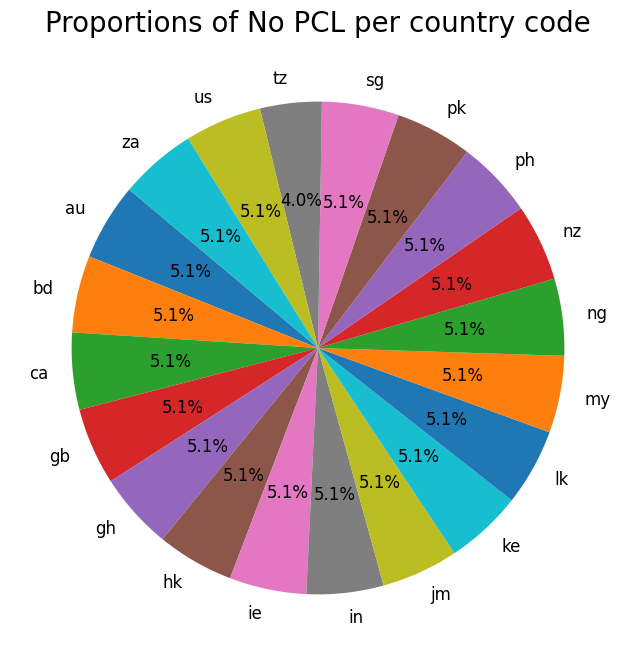

In [54]:
# Extract unique country codes
countries = np.unique(df["Country"])

# Calculate counts for each country and label
no_pcl_counts = [len(df[(df["Country"] == c) & (df["BinaryLabel"] == 0)]) for c in countries]
pcl_counts = [len(df[(df["Country"] == c) & (df["BinaryLabel"] == 1)]) for c in countries]

no_pcl_proportions = np.round(np.array(no_pcl_counts) / sum(no_pcl_counts),2)
pcl_proportions = np.round(np.array(pcl_counts) / sum(pcl_counts),2)

plt.figure(figsize=(8, 8))  # Optional: specify the figure size
plt.title('Proportions of PCL per country code', fontsize=20)
plt.pie(pcl_proportions, labels=countries, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.show()

plt.figure(figsize=(8, 8))  # Optional: specify the figure size
plt.title('Proportions of No PCL per country code', fontsize=20)
plt.pie(no_pcl_proportions, labels=countries, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.show()

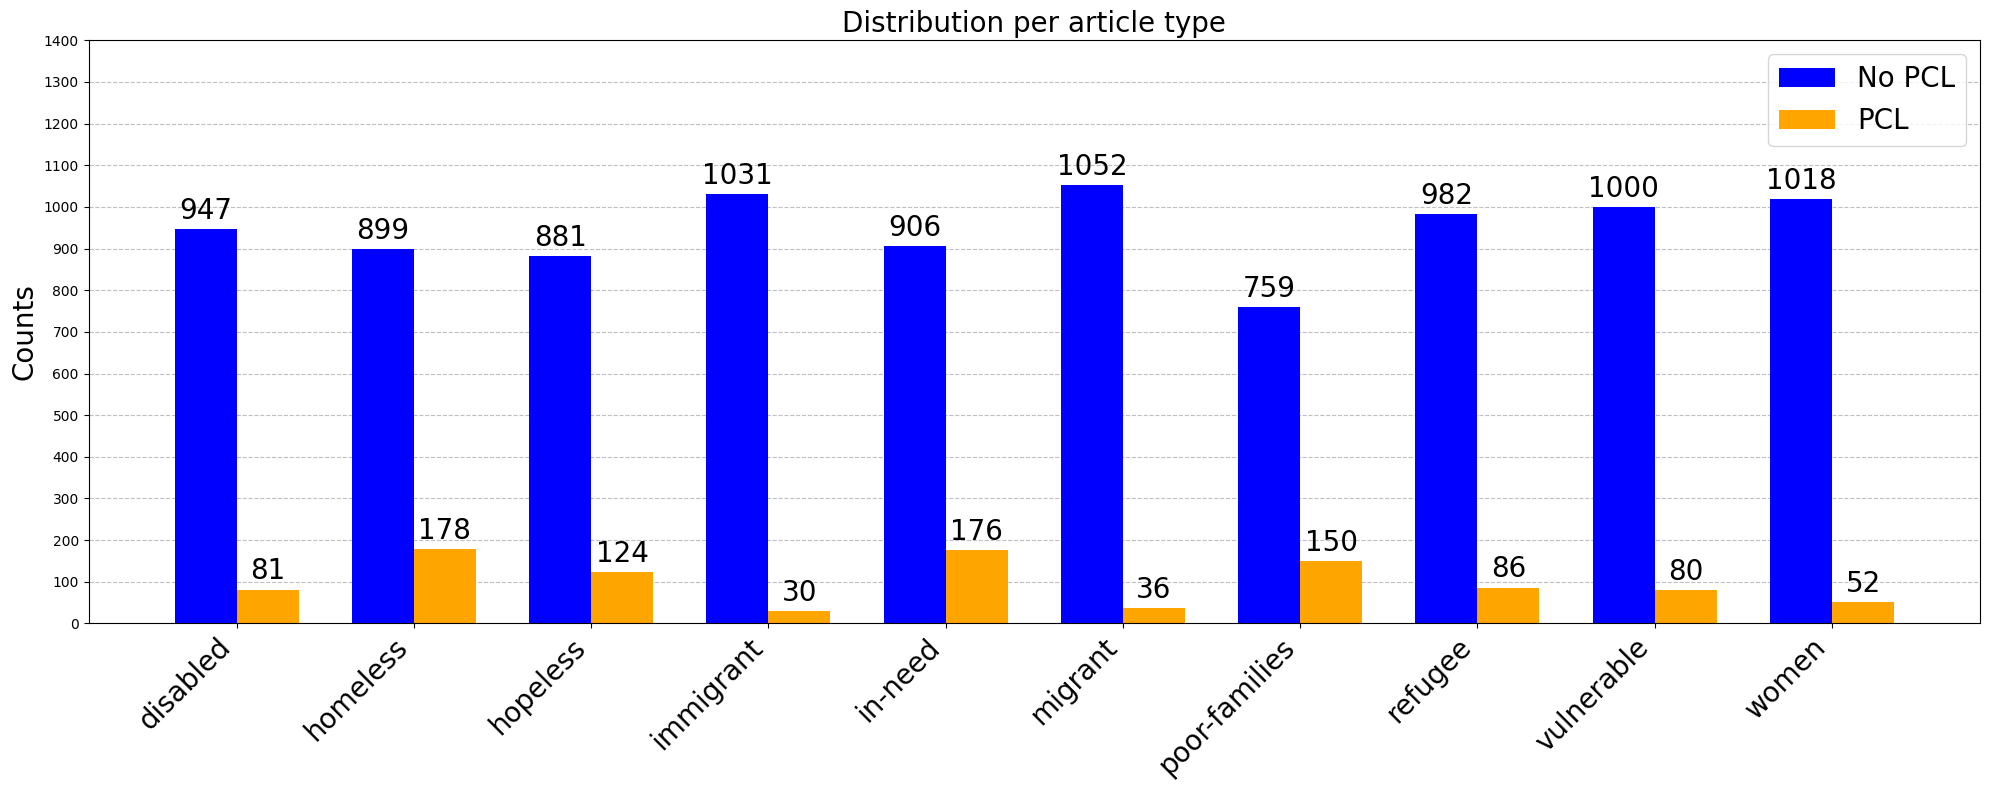

In [41]:
# Extract unique article types
article_type = np.unique(df["Category"])

# Calculate counts for each category and label
no_pcl_counts = [len(df[(df["Category"] == c) & (df["BinaryLabel"] == 0)]) for c in article_type]
pcl_counts = [len(df[(df["Category"] == c) & (df["BinaryLabel"] == 1)]) for c in article_type]

# Setting up the figure and axes for the grouped bar chart
fig, ax = plt.subplots(figsize=(20, 8))

# Set the positions of the bars on the x-axis
x = np.arange(len(article_type))

# Make the plot
bar_width = 0.35  # Width of the bars
bars1 = ax.bar(x - bar_width/2, no_pcl_counts, bar_width, label='No PCL', color='blue')
bars2 = ax.bar(x + bar_width/2, pcl_counts, bar_width, label='PCL', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Counts', fontsize=20)
ax.set_title('Distribution per article type', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(article_type, rotation=45, ha="right", fontsize=20)
ax.legend(fontsize=20)

ax.set_yticks(np.arange(0, 1500, 100))


# Function to add a label on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=20)

# Call the function to add labels on top of the bars
add_labels(bars1)
add_labels(bars2)

# Adding a grid
ax.grid(which='major', axis='y', linestyle='--', color='grey', alpha=0.5)
ax.set_axisbelow(True)

plt.tight_layout()

plt.show()

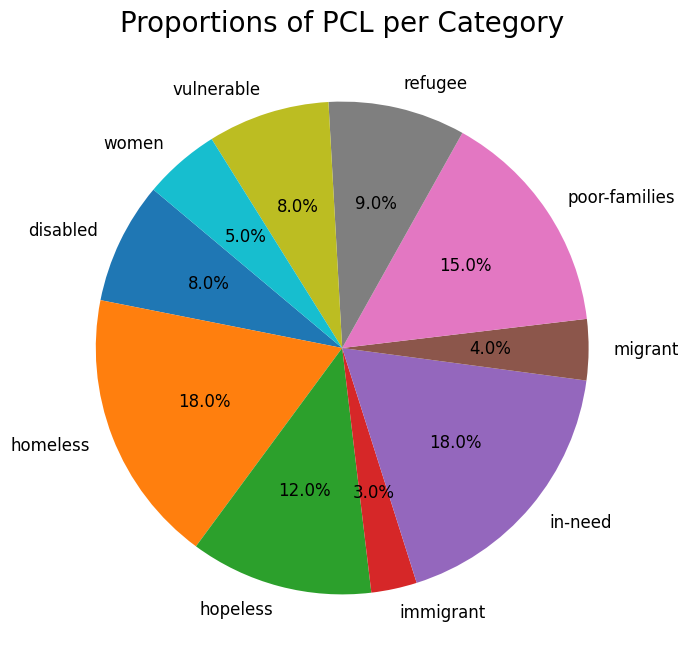

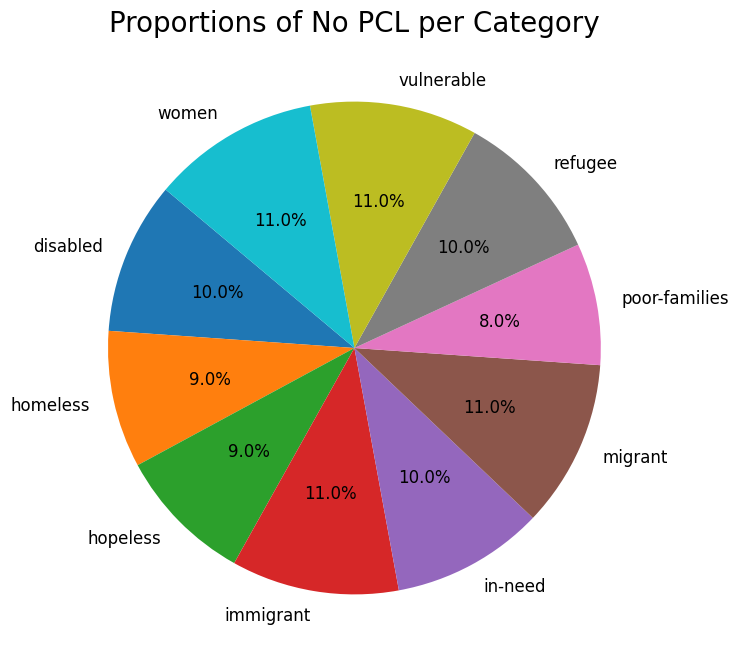

In [71]:
# Extract unique article types
article_type = np.unique(df["Category"])

# Calculate counts for each category and label
no_pcl_counts = [len(df[(df["Category"] == c) & (df["BinaryLabel"] == 0)]) for c in article_type]
pcl_counts = [len(df[(df["Category"] == c) & (df["BinaryLabel"] == 1)]) for c in article_type] 

no_pcl_proportions = np.round(np.array(no_pcl_counts) / sum(no_pcl_counts),2)
pcl_proportions = np.round(np.array(pcl_counts) / sum(pcl_counts),2)

no_pcl_proportions = np.round(np.array(no_pcl_counts) / sum(no_pcl_counts),2)
pcl_proportions = np.round(np.array(pcl_counts) / sum(pcl_counts),2)

plt.figure(figsize=(8, 8))  # Optional: specify the figure size
plt.title('Proportions of PCL per Category', fontsize=20)
plt.pie(pcl_proportions, labels=article_type, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.show()

plt.figure(figsize=(8, 8))  # Optional: specify the figure size
plt.title('Proportions of No PCL per Category', fontsize=20)
plt.pie(no_pcl_proportions, labels=article_type, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.show()


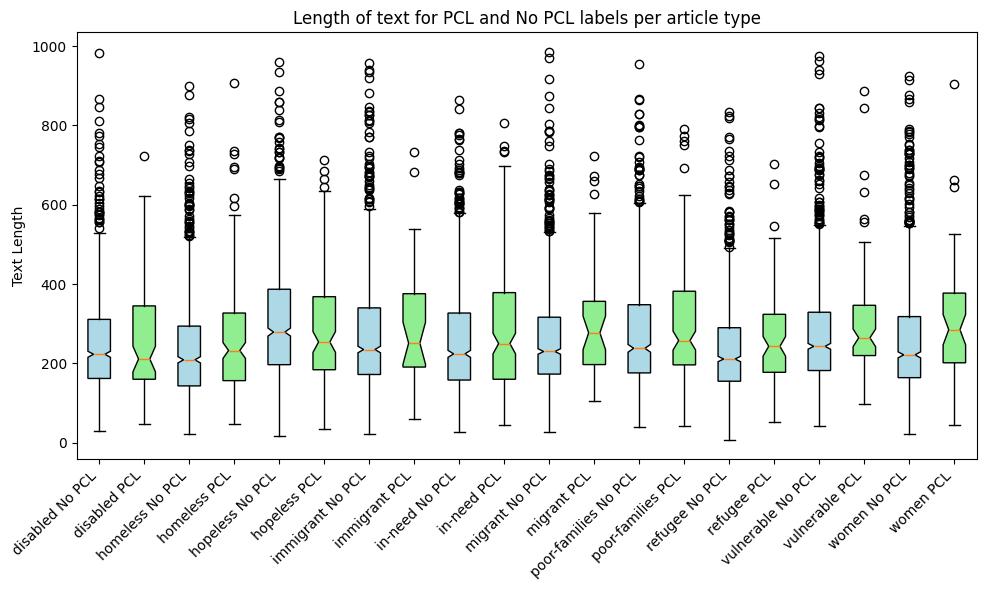

In [62]:
# Prepare the data
article_types = np.unique(df["Category"])
data = []
ticks = []

# Iterate over each article type to prepare data for "No PCL" and "PCL"
for i, c in enumerate(article_types):
    # Filter data for "No PCL" and "PCL" within the current article type
    no_pcl_lengths = df[(df["Category"] == c) & (df["BinaryLabel"] == 0) & (df["TextLength"] < 1000)]["TextLength"]
    pcl_lengths = df[(df["Category"] == c) & (df["BinaryLabel"] == 1) & (df["TextLength"] < 1000)]["TextLength"]
    
    # Add the data to the list for plotting
    data.append(no_pcl_lengths)
    data.append(pcl_lengths)
    
    # Prepare ticks to label the groups correctly
    ticks.append(f'{c} No PCL')
    ticks.append(f'{c} PCL')

# Creating the plot
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed
bp = ax.boxplot(data, patch_artist=True, positions=np.arange(len(data)), notch=True, meanline=True)

# Set the colors for "No PCL" and "PCL" boxes
colors = ['lightblue', 'lightgreen'] * len(article_types)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Labeling
ax.set_xticks(np.arange(len(data)))
ax.set_xticklabels(ticks, rotation=45, ha="right")
ax.set_title('Length of text for PCL and No PCL labels per article type')
ax.set_ylabel('Text Length')

plt.tight_layout()
plt.show()

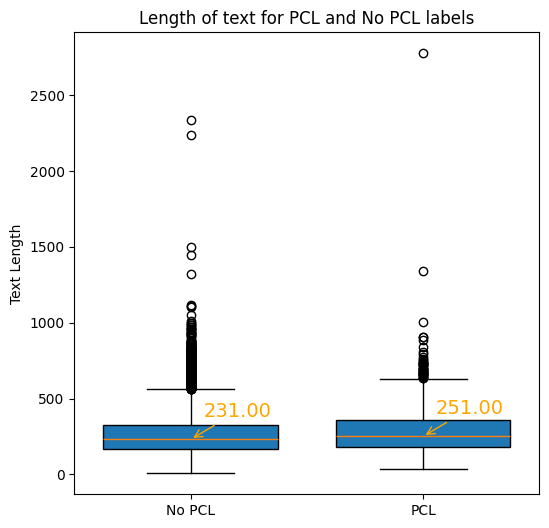

In [70]:
# Filter data to include only rows where TextLength is less than 3000
df_filtered = df[df["TextLength"] < 3000]

# Split the filtered data by BinaryLabel
text_lengths_no_pcl = df_filtered[df_filtered["BinaryLabel"] == 0]["TextLength"]
text_lengths_pcl = df_filtered[df_filtered["BinaryLabel"] == 1]["TextLength"]

# Prepare data for boxplot
data_to_plot = [text_lengths_no_pcl, text_lengths_pcl]
labels = ['No PCL', 'PCL']

# Creating boxplot
fig, ax = plt.subplots(figsize=(6, 6))
bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True, showmeans=False, widths=0.75)

# Function to annotate the median
def annotate_median(data, category_index):
    median_val = np.median(data)
    # Annotate the median
    ax.annotate(f'{median_val:.2f}', xy=(category_index, median_val), xytext=(category_index + 0.2, median_val + 120),
                textcoords="data", ha='center', va='bottom',
                fontsize=14, color="orange", arrowprops=dict(arrowstyle="->", color="orange"))

# Annotate medians for "No PCL" and "PCL"
annotate_median(text_lengths_no_pcl, 1)
annotate_median(text_lengths_pcl, 2)

# Adding titles and labels
ax.set_title('Length of text for PCL and No PCL labels')
ax.set_ylabel('Text Length')

plt.show()